In [9]:
# Importing required modules and helper functions for Random Forest modeling
import sys
sys.path.append(R'E:\Data science\Titanic dataset\notebooks')

# Importing needed libraries
from auto_imports import *
model_results_imports()
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder , RobustScaler , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split , GridSearchCV

### Data Loading

Load the processed training and prediction datasets for the Random Forest model.

In [10]:
# Load the processed data for training and prediction
df = pd.read_csv(r'E:\Data science\Titanic dataset\data\Processed data\Data Analysis\processed_data.csv')
train_RF_df = df[df['ind'] == 'train'].drop('ind' , axis = 1)
predict_RF_df = df[df['ind'] == 'test'].drop('ind' , axis =1)

train_RF_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cells_count,Cabin_letter,Title,FamilySize,Is Alone,Is Special Agent/route,TicketBatch,SharedTicket,Fare per Person,Fare per Age,Tickets counts
0,1,0.0,3,male,22.0,1,0,7.2500,S,3,C,Mr,2,0,1,0,0,3.62500,0.329545,1
1,2,1.0,1,female,38.0,1,0,71.2833,C,1,C,Mrs,2,0,1,0,0,35.64165,1.875876,2
2,3,1.0,3,female,26.0,0,0,7.9250,S,3,C,Miss,1,1,1,0,0,7.92500,0.304808,1
3,4,1.0,1,female,35.0,1,0,53.1000,S,1,C,Mrs,2,0,0,0,0,26.55000,1.517143,2
4,5,0.0,3,male,35.0,0,0,8.0500,S,3,C,Mr,1,1,0,0,0,8.05000,0.230000,1


### Model Training

Split the data and fit the Random Forest classifier.

In [ ]:
# Split features and target variable, then split into train/test sets
X = train_RF_df.drop('Survived' , axis =1)
y= train_RF_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=100 ,
                                                    stratify=y)

In [13]:
train_RF_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             891 non-null    int64  
 1   Survived                891 non-null    float64
 2   Pclass                  891 non-null    int64  
 3   Sex                     891 non-null    object 
 4   Age                     891 non-null    float64
 5   SibSp                   891 non-null    int64  
 6   Parch                   891 non-null    int64  
 7   Fare                    891 non-null    float64
 8   Embarked                891 non-null    object 
 9   cells_count             891 non-null    int64  
 10  Cabin_letter            891 non-null    object 
 11  Title                   891 non-null    object 
 12  FamilySize              891 non-null    int64  
 13  Is Alone                891 non-null    int64  
 14  Is Special Agent/route  891 non-null    int64  

##### Model Tuning with hyperparameters

In [14]:
# restore preprocessor variable of the columns transformer

%store -r preprocessor

In [18]:
# making the model pipeline

pipeline = Pipeline(
    steps=[
        ('perprocessor',preprocessor),
        ('random_forest' , RandomForestClassifier(random_state=42 , class_weight='balanced'))
        
    ]
)

In [19]:
# Hyperparameters tuning 
from sklearn.metrics import accuracy_score , f1_score , make_scorer , precision_score , recall_score
# scoring dict 
scoring = {
    'accuracy' : make_scorer(accuracy_score),
    'f1_score' : make_scorer(f1_score),
    'precision': make_scorer(precision_score , pos_label = 1),
    'recall' : make_scorer(recall_score, pos_label=1)
}
    # hyperparameters
param_grid = {
    'random_forest__n_estimators': [100, 200, 300],
    'random_forest__max_depth': [None, 5, 10, 20],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4],
    'random_forest__max_features': ['auto', 'sqrt', 'log2'],
    'random_forest__bootstrap': [True, False]
}

# grid search algorithm to find best hyperparameter
grid_search = GridSearchCV(pipeline ,
                           param_grid ,
                           cv=5 ,
                           scoring=scoring ,
                           refit='f1_score' , 
                           n_jobs=-1 , 
                           verbose=1)

grid_search.fit(X_train , y_train) # fit the model

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'random_forest__bootstrap': [True, False], 'random_forest__max_depth': [None, 5, ...], 'random_forest__max_features': ['auto', 'sqrt', ...], 'random_forest__min_samples_leaf': [1, 2, ...], ...}"
,scoring,"{'accuracy': make_scorer(a...hod='predict'), 'f1_score': make_scorer(f...hod='predict'), 'precision': make_scorer(p..., pos_label=1), 'recall': make_scorer(r..., pos_label=1)}"
,n_jobs,-1
,refit,'f1_score'
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('standard_scaler', ...), ('fare', ...), ...]"


In [21]:
print(f'Best hyperparameters found: {grid_search.best_params_}')
print(f'\nBest cross valdiation f1 socres: {grid_search.best_score_:.4f}')

Best hyperparameters found: {'random_forest__bootstrap': True, 'random_forest__max_depth': 5, 'random_forest__max_features': 'sqrt', 'random_forest__min_samples_leaf': 4, 'random_forest__min_samples_split': 10, 'random_forest__n_estimators': 300}

Best cross valdiation f1 socres: 0.7816


In [22]:
RF_ = grid_search.best_estimator_

In [25]:
# Evaluate model using cross-validation for accuracy and F1 score
accuracy , f1 = accuracy_f1_scores(X_train , y_train , RF_)

CV=5 , random_state=42 , shuffel=True
accuracy:  0.815936176499557
f1:  0.7657611925629751
   Accuracy score  F1 score
0        0.867133  0.837607
1        0.818182  0.750000
2        0.816901  0.775862
3        0.767606  0.713043
4        0.809859  0.752294


In [26]:
# Evaluate model performance and check for overfitting/underfitting
accuracy_DP , f1_DP , y_pred = drop_percentages(X_test , y_test , RF_ , accuracy , f1).values()

print('Accuracy drop percentage: ' , accuracy_DP)
print('F1 drop percentage: ' , f1_DP)

Accuracy drop percentage:  -1.1%
F1 drop percentage:  -2.9%


In [27]:
# Show classification report for predictions on the test set
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85       110
         1.0       0.73      0.87      0.79        69

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.83      0.83       179



intersection precision point:  0.8115942028985508
intersection recall point:  0.8115942028985508
intersection threshold point:  0.621166559351773


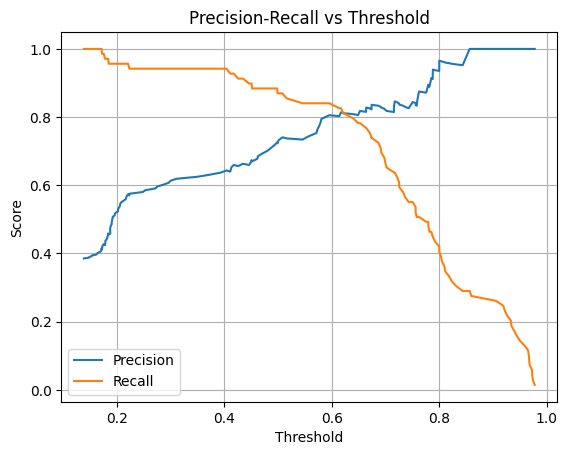

In [30]:
# Plot precision-recall curve to help select an optimal threshold
from sklearn.metrics import precision_recall_curve 

y_probs = RF_.predict_proba(X_test)[:, 1]  # get probability of class 1

# calculate precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
idx = np.argmin(np.abs(precision - recall))
precisoin_at_intersection = precision[idx]
recall_at_intersection = recall[idx]
threshold_at_intersection = thresholds[idx]
print('intersection precision point: ',precisoin_at_intersection)
print('intersection recall point: ' , recall_at_intersection)
print('intersection threshold point: ' , threshold_at_intersection)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label="Recall")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Apply custom threshold for final predictions and show classification report
y_probs = RF_.predict_proba(X_test)[:, 1]  # get probability of class 1

#
y_pred_custom = y_probs >= 0.59

print(classification_report(y_test , y_pred_custom))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88       110
         1.0       0.81      0.84      0.82        69

    accuracy                           0.86       179
   macro avg       0.85      0.86      0.85       179
weighted avg       0.86      0.86      0.86       179



### Model Results

- Accuracy: ≈ 86%
- F1: ≈ 85%
- Model is balanced
- No signs of overfitting or underfitting

> This model is well-fitted and strong.

The model is now tuned and ready for ensembling with other models.

[Text(0, 0.5, 'Not survived'), Text(0, 1.5, 'Survived')]

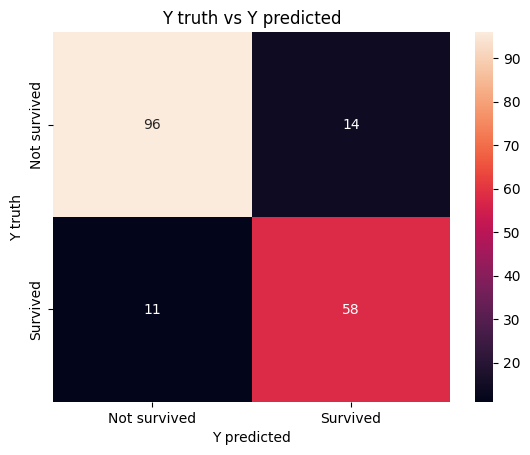

In [41]:
# Plot confusion matrix for the custom threshold predictions
cm = confusion_matrix(y_test , y_pred_custom) 
plt.title('Y truth vs Y predicted')
ax = sns.heatmap(cm ,annot=True)
plt.xlabel('Y predicted')
plt.ylabel('Y truth')
ax.set_xticklabels(['Not survived' , 'Survived'])
ax.set_yticklabels(['Not survived' , 'Survived'])

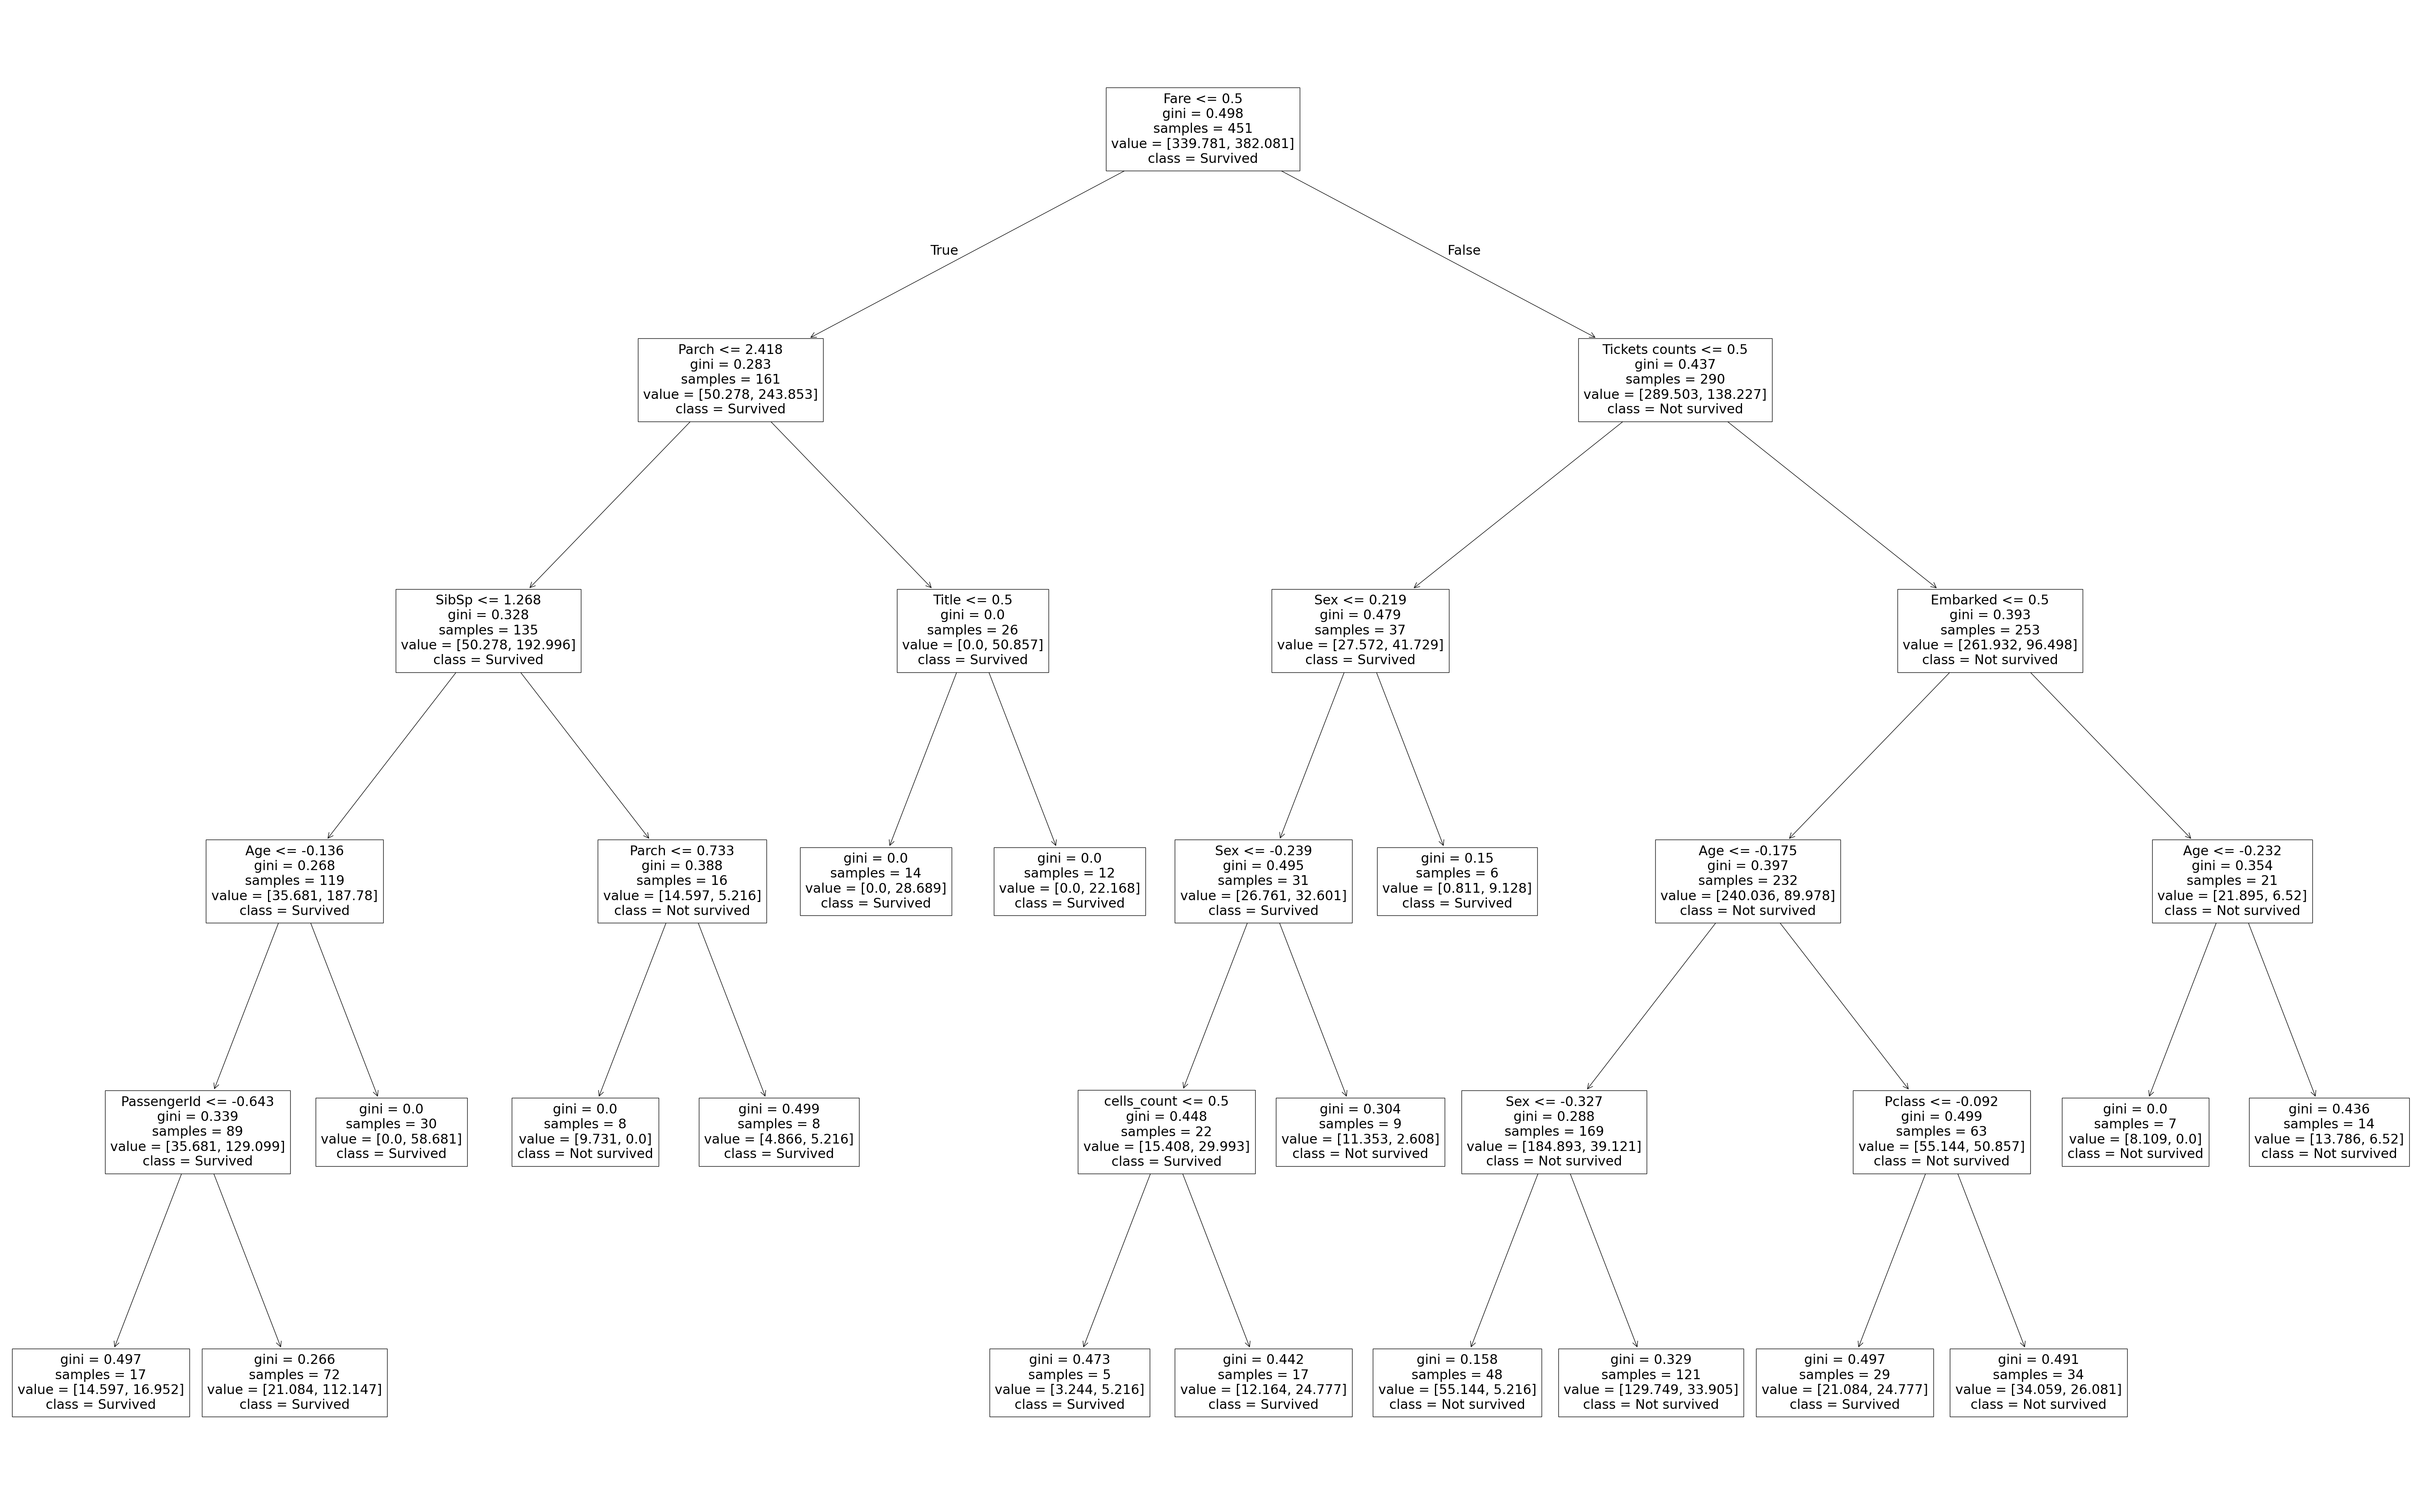

In [44]:
# Visualize one of the decision trees in the Random Forest
plt.figure(figsize=(80,50)) # plotting random forest diagram
plot_tree(RF_.named_steps['random_forest'].estimators_[0] , feature_names=X_train.columns , class_names=['Not survived' , 'Survived'])
plt.show()

In [45]:
# Save the trained Random Forest model for later use (e.g., in ensembling)
import joblib

joblib.dump(RF_,'E:\Data science\Titanic dataset\Models\RandomForest.pkl')

['E:\\Data science\\Titanic dataset\\Models\\RandomForest.pkl']

In [46]:
# Check info of the prediction dataset
predict_RF_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 891 to 1308
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             418 non-null    int64  
 1   Survived                0 non-null      float64
 2   Pclass                  418 non-null    int64  
 3   Sex                     418 non-null    object 
 4   Age                     418 non-null    float64
 5   SibSp                   418 non-null    int64  
 6   Parch                   418 non-null    int64  
 7   Fare                    418 non-null    float64
 8   Embarked                418 non-null    object 
 9   cells_count             418 non-null    int64  
 10  Cabin_letter            418 non-null    object 
 11  Title                   418 non-null    object 
 12  FamilySize              418 non-null    int64  
 13  Is Alone                418 non-null    int64  
 14  Is Special Agent/route  418 non-null    int6

In [47]:
# Save model predictions for the prediction set for submission or ensembling
save_model_predictions(
    (RF_.predict_proba(predict_RF_df.drop('PassengerId' , axis =1))[:, 1] >=0.6).astype(int),
    'RandomForest'
)